Saved model to models/model_v1.pkl
Model v1 Accuracy: 0.9333
Saved model to models/model_v2.pkl
Model v2 Accuracy: 0.9667
Saved model to models/model_v3.pkl
Model v3 Accuracy: 1.0000
Saved model to models/model_v4.pkl
Model v4 Accuracy: 1.0000
Saved model to models/model_final_model.pkl
Loaded model accuracy: 1.0
Wine Model Accuracy: 1.0


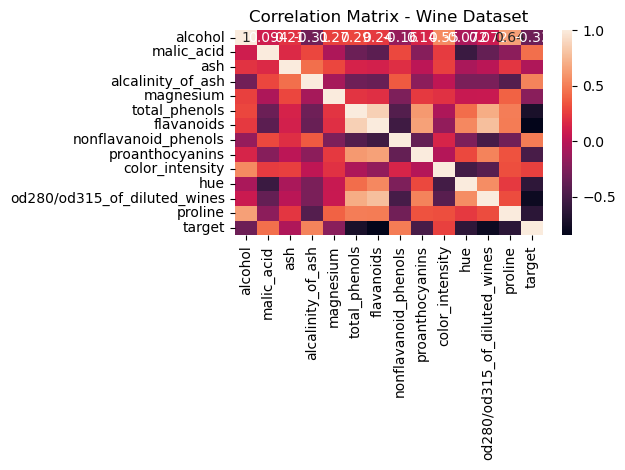

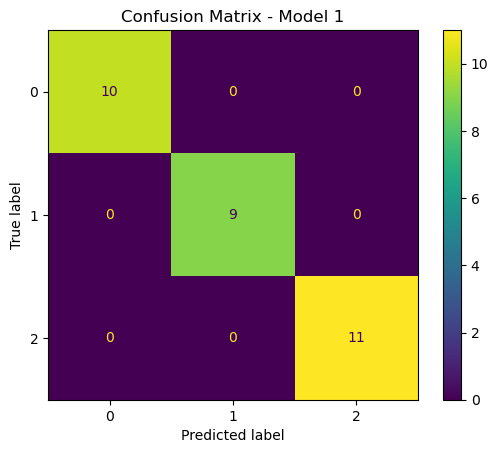

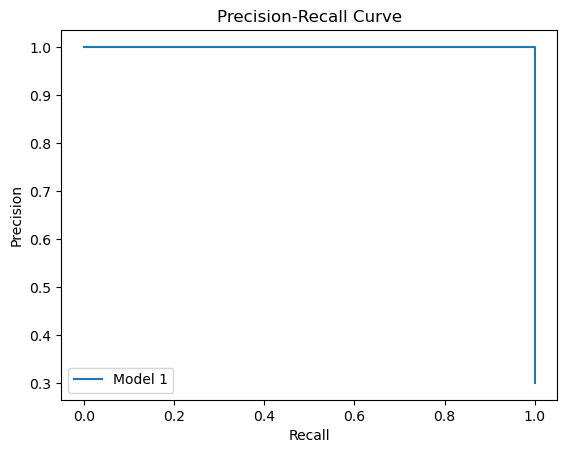

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
from sklearn.datasets import load_iris, load_wine

# ---------- Common Utilities ----------
def load_iris_dataset():
    data = load_iris()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target
    return df

def load_wine_dataset():
    data = load_wine()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target
    return df

def preprocess_data(df, target_col='target'):
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def train_model(X_train, y_train, C=1.0):
    model = LogisticRegression(C=C, max_iter=200)
    model.fit(X_train, y_train)
    return model

def save_model(model, version='v1'):
    os.makedirs('models', exist_ok=True)
    filename = f'models/model_{version}.pkl'
    joblib.dump(model, filename)
    print(f"Saved model to {filename}")

def load_model(version='v1'):
    return joblib.load(f'models/model_{version}.pkl')

# ---------- 1. GitHub: No Code ----------
# Follow the manual steps for Git setup.

# ---------- 2. Model Training and Versioning ----------
df_iris = load_iris_dataset()
X_train, X_test, y_train, y_test = preprocess_data(df_iris)

for i, c in enumerate([0.01, 0.1, 1, 10], start=1):
    model = train_model(X_train, y_train, C=c)
    save_model(model, version=f'v{i}')
    print(f"Model v{i} Accuracy: {model.score(X_test, y_test):.4f}")

# ---------- 3. Save and Reuse Model ----------
model_final = train_model(X_train, y_train)
save_model(model_final, 'final_model')
model_loaded = load_model('final_model')
print("Loaded model accuracy:", model_loaded.score(X_test, y_test))

# ---------- 4. Wine Model (Reproducible Pipeline) ----------
df_wine = load_wine_dataset()
Xw_train, Xw_test, yw_train, yw_test = preprocess_data(df_wine)
model_wine = train_model(Xw_train, yw_train)
print("Wine Model Accuracy:", model_wine.score(Xw_test, yw_test))

# ---------- 5. EDA and Report ----------
os.makedirs("eda", exist_ok=True)
sns.heatmap(df_wine.corr(), annot=True)
plt.title("Correlation Matrix - Wine Dataset")
plt.tight_layout()
plt.savefig("eda/correlation_matrix.png")

# ---------- 6. Model Performance Visualizations ----------
os.makedirs("results", exist_ok=True)
model1 = LogisticRegression(C=1).fit(X_train, y_train)
model2 = LogisticRegression(C=10).fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(model1, X_test, y_test)
plt.title("Confusion Matrix - Model 1")
plt.savefig("results/confusion_matrix_model1.png")

probs = model1.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test == 1, probs)
plt.figure()
plt.plot(recall, precision, label="Model 1")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.savefig("results/precision_recall_model1.png")
